# Notebook 3 - Resolvendo uma equação não-linear e resolvendo um sistema linear

Gabrielly de Andrade da Silva - 116149740

## 1. Método de Newton

Esperamos que com esse método a função convirja para zero com inúmeras tentativas se achar a reta tangente (derivada) nos pontos.

Com esse método, queremos nos aproximar cada vez mais do zero da função através de iterações de cálculo de reta tangente.

![Método de Newton](./newton.gif)

Como a reta tangente é da forma $g(x) = ax + b$, sabemos que a derivada nesse ponto é dada por $f'(x_0)$, logo $g(x) = f'(x_0)x + b$.

Estamos interessados em descobrir a raiz da função (zero da função) de um ponto dessa equação g(x). Igualando a zero temos que:

$0 = g(x_1) = f'(x_0)*x_1 + b$ 

$b = -f'(x_0)*x_1$

Então:

$g(x) = f'(x_0)*x - f'(x_0)*x_1$

Como essa reta tangente da função $g$ compartilha um ponto comum com a função $f$, temos que

$f(x_0) = f'(x_0)*x_0 - f'(x_0)*x_1$

Isolando $x_1$ que é o próximo termo que queremos calcular chegamos a

$x_1 = x_0 - \frac{f(x_0)}{f'(x_0)}$

Conseguimos uma aproximação local se estivermos próximo da solução.

### Teorema de Taylor

$f(x+d) = f(x) + d*f'(x) + o(|d|)$

Se $f$ é diferenciável em torno de x. 
Repare que o último termo deve possuir limite com d tendendo a 0. 

Se d é pequeno, 

$f(x+d) = f(x) + d*f'(x)$ é uma boa aproximação para $f(x+d)$

Para esse método, ao invés de resolver $f(x)=0$ igual fizemos nos outros métodos, estamos interessados em escolher um ponto e calcular a sua reta tangente para resolver

$f(x_0) + d*f'(x_0) = 0$

### Calculando para sqrt(2)

In [114]:
f(x) = x^2 - 2
fd(x) = 2x
x = 1.0

1.0

In [28]:
# Aqui a cada interação vemos que o método já salta bem próximo para o resultado esperado (zero da função)
x = x - f(x) / fd(x)
x, f(x)

(1.4142135623730951, 4.440892098500626e-16)

In [99]:
x = big"1"

1

In [111]:
x = x - f(x) / fd(x)
x, f(x)

(1.414213562373095048801688724209698078569671875376948073176679737990732478462102, -1.727233711018888925077270372560079914223200072887256277004740694033718360632485e-77)

Esse método possui uma convergência quadrática, ou seja, ele consegue se aproximar do número de casas decimais de forma quadrada. Comparando com o método de bissecção, esse método é bem mais rápido se tiver condições favoráveis para a função.

In [3]:
function newton(f, fd, x; tol_absoluta = 1e-8, tol_relativa = 1e-8, tempo_maximo = 10.0, iteracao_maxima = 1000)
    fx = f(x)
    tolerancia = tol_absoluta + tol_relativa * abs(fx)
    
    iteracao = 0
    t0 = time()
    variacao_tempo = time() - t0
    status = :desconhecido

    resolvido = (abs(fx) <= tolerancia)
    iteracoes_demais = (iteracao >= iteracao_maxima || variacao_tempo >= tempo_maximo)
    
    while !(resolvido || iteracoes_demais)
        # Aqui estamos divivindo pela derivada e devemos nos atentar quando esse valor da zero
        fdx = fd(x)
        if abs(fdx) <= tolerancia
                status = :derivada_nula
                break
        end
        x = x - fx/fdx
        fx = f(x)
        
        iteracao += 1
        variacao_tempo = time() - t0
        resolvido = (abs(fx) <= tolerancia)
        iteracoes_demais = (iteracao >= iteracao_maxima || variacao_tempo >= tempo_maximo)
    end
    
    
    if resolvido
        status = :sucesso
    elseif iteracoes_demais
        if iteracao >= iteracao_maxima
            status = :maximo_de_iteracao_alcancada
        else
            status = :ttempo_maximo_alcancado
        end
    end
    
    return x, fx, status, iteracao
    
    
end

newton (generic function with 1 method)

In [131]:
f(x) = x^2 - 2
fd(x) = 2x
x = 1.0

1.0

In [132]:
newton(f, fd, 1.0)

(1.4142135623746899, 4.510614104447086e-12, :sucesso, 4)

In [133]:
newton(f, fd, big"1", tol_absoluta=1e-100, tol_relativa=0.0)

(1.414213562373095048801688724209698078569671875376948073176679737990732478462102, -1.727233711018888925077270372560079914223200072887256277004740694033718360632485e-77, :maximo_de_iteracao_alcancada, 1000)

In [136]:
f(x) = x * exp(x) - 1
fd(x) = exp(x) + x*exp(x)
newton(f, fd, 0.0)

(0.5671432965302959, 1.6912338640651114e-8, :sucesso, 5)

### Exemplo com valor de parcelas (tabela price)

In [144]:
qtd_parcelas = 48
valor = 40_000
parcela = 900
function equacao_price(i) 
    if i == 0
        return parcela - valor / qtd_parcelas
    else
        return parcela - valor * (1 + i)^qtd_parcelas * i / ((1 + i)^qtd_parcelas - 1)
    end
end
equacao_price(0)

66.66666666666663

Aqui não temos a derivada dessa função e gostaríamos de uma aproximação.

In [156]:
import Pkg; Pkg.add("ForwardDiff");

  Resolving package versions...
No Changes to `~/.julia/environments/v1.5/Project.toml`
No Changes to `~/.julia/environments/v1.5/Manifest.toml`


In [157]:
using ForwardDiff;

In [147]:
equacao_price_der(i) = ForwardDiff.derivative(equacao_price, i)
newton(equacao_price, equacao_price_der, 1.0)

(0.003185958918278095, -0.00013304386357049225, :sucesso, 4)

### Exemplo com Fractal d $x^3 - x$

In [8]:
using Plots
gr(size=(600,400));

┌ Info: Saved animation to 
│   fn = /home/gabrielly/Documents/MAB230-Calculo-Numerico/Atividades/exemplo.gif
└ @ Plots /home/gabrielly/.julia/packages/Plots/vsE7b/src/animation.jl:104


Plots.AnimatedGif("/home/gabrielly/Documents/MAB230-Calculo-Numerico/Atividades/exemplo.gif")
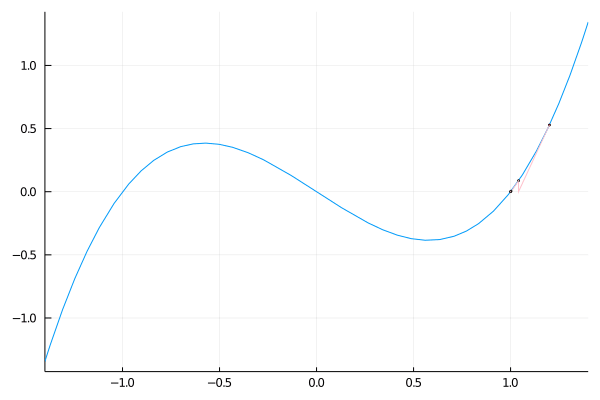

In [179]:
f(x) = x^3 - x
fd(x) = 3x^2 - 1

anim = Animation()
for x = 1.2:0.01:1.4
    plot(f, -1.4, 1.4, leg=false)
    scatter!([x], [f(x)], c=:red, ms=2)
    for k = 1:3
        xp = x - f(x) / fd(x)
        plot!([x, xp, xp], [f(x), 0, f(xp)], c=:pink)
        scatter!([xp], [f(xp)], c=:pink, ms=2)
        x = xp
    end

    xlims!(-1.4, 1.4)
    frame(anim)
end
gif(anim, "exemplo.gif", fps=10)

┌ Info: Saved animation to 
│   fn = /home/gabrielly/Documents/MAB230-Calculo-Numerico/Atividades/exemplo.gif
└ @ Plots /home/gabrielly/.julia/packages/Plots/vsE7b/src/animation.jl:104


Plots.AnimatedGif("/home/gabrielly/Documents/MAB230-Calculo-Numerico/Atividades/exemplo.gif")
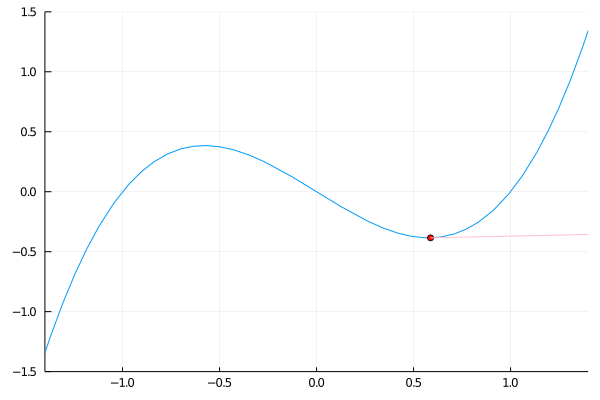

In [181]:
anim = Animation()
for x = sqrt(3)/3 + 1e-2:0.01:1.4
    plot(f, -1.4, 1.4, leg=false)
    scatter!([x], [f(x)], c=:red, ms=4)
    for k = 1:3
        xp = x - f(x) / fd(x)
        plot!([x, xp, xp], [f(x), 0, f(xp)], c=:pink)
        scatter!([xp], [f(xp)], c=:pink, ms=2)
        x = xp
    end

    xlims!(-1.4, 1.4)
    ylims!(-1.5, 1.5)
    frame(anim)
end
gif(anim, "exemplo.gif", fps=10)

┌ Info: Saved animation to 
│   fn = /home/gabrielly/Documents/MAB230-Calculo-Numerico/Atividades/exemplo.gif
└ @ Plots /home/gabrielly/.julia/packages/Plots/vsE7b/src/animation.jl:104


Plots.AnimatedGif("/home/gabrielly/Documents/MAB230-Calculo-Numerico/Atividades/exemplo.gif")
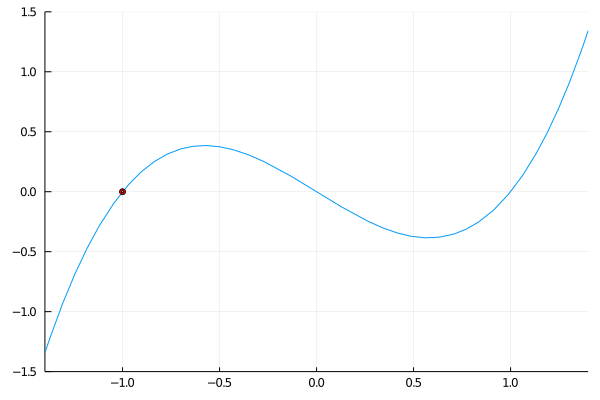

In [182]:
anim = Animation()
for x = -1.0:0.01:1.0
    plot(f, -1.4, 1.4, leg=false)
    scatter!([x], [f(x)], c=:red, ms=4)
    for k = 1:3
        xp = x - f(x) / fd(x)
        plot!([x, xp, xp], [f(x), 0, f(xp)], c=:pink)
        scatter!([xp], [f(xp)], c=:pink, ms=2)
        x = xp
    end

    xlims!(-1.4, 1.4)
    ylims!(-1.5, 1.5)
    frame(anim)
end
gif(anim, "exemplo.gif", fps=10)

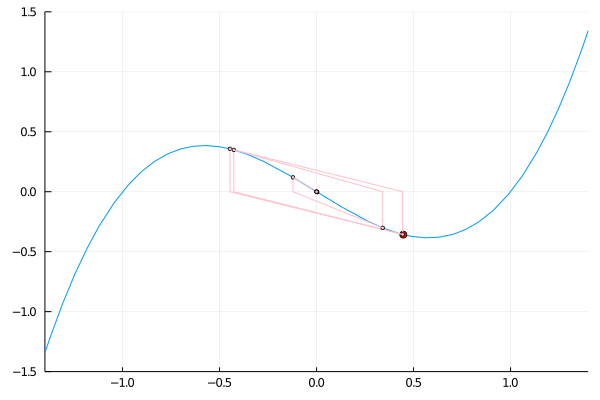

In [187]:
x = sqrt(5) / 5 - 1e-4
plot(f, -1.4, 1.4, leg=false)
scatter!([x], [f(x)], c=:red, ms=4)

for k = 1:10
    xp = x - f(x) / fd(x)
    plot!([x, xp, xp], [f(x), 0, f(xp)], c=:pink)
    scatter!([xp], [f(xp)], c=:pink, ms=2)
    x = xp
end

xlims!(-1.4, 1.4)
ylims!(-1.5, 1.5)

Dependendo do chute inicial do ponto, podemos ter um ciclo. 
O fractal é quando definimos onde cada um dos intervalos está convergindo, pois fractal é como tivessemos uma fronteira.

In [192]:
anim = Animation()
X = []
C = []
colors = [:red, :green, :blue]

for x = -1.4:0.01:1.4
    plot(f, -1.4, 1.4, leg=false)
    scatter!([x], [f(x)], c=:red, ms=4)
    push!(X,x)
    for k = 1:10
        xp = x - f(x) / fd(x)
        plot!([x, xp, xp], [f(x), 0, f(xp)], c=:pink)
        scatter!([xp], [f(xp)], c=:pink, ms=2)
        x = xp
    end
    j = argmin(abs.(x .- [-1, 0, 1]))
    push!(C, colors[j])
    
    for (xi, ci) in zip(X, C)
        plot!([xi, xi], [-1.5, 1.5], c=ci)
    end

    xlims!(-1.4, 1.4)
    ylims!(-1.5, 1.5)
    frame(anim)
end
gif(anim, "convergencia.gif", fps=10);

┌ Info: Saved animation to 
│   fn = /home/gabrielly/Documents/MAB230-Calculo-Numerico/Atividades/exemplo.gif
└ @ Plots /home/gabrielly/.julia/packages/Plots/vsE7b/src/animation.jl:104


## 2. (Lista) Metodo de Newton e Método do Ponto Fixo

In [21]:
using Plots
gr(size=(600,400))

Plots.GRBackend()

#### 1- Dê um exemplo de uma função f(x) para a qual o método de Newton, com valor inicial $x_0$ :




(a) não acha nenhum zero para qualquer escolha de $x_0$

R.: A função $1/x$ é uma função que não é diferenciável para todos os pontos, não possuindo uma derivada continua. Logo, não conseguimos achar nenhum zero de função para qualquer escolha de $x_0$

In [ ]:
f1a(x) = 1/x
f1ad(x) = -1/x^2
for x=1:100
    print(newton(f1a, f1ad, x))
end

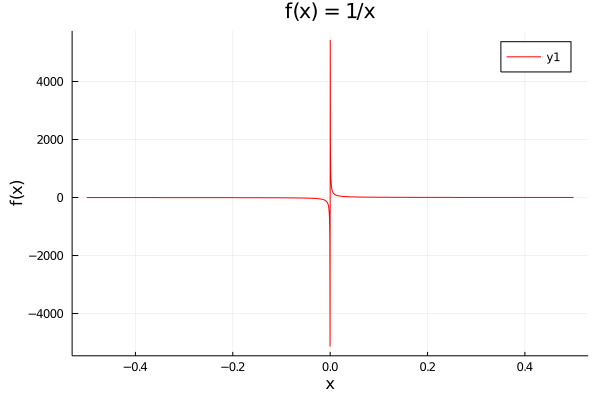

In [30]:
x1, x2 = -0.5, 0.5
plot(f1a, x1, x2, c=:red)
xlabel!("x")
ylabel!("f(x)")
title!("f(x) = 1/x")

(c) converge lentamente para um zero, para algum $x_0$

In [108]:
f1c(x) = x^2 - 4
f1cd(x) = 2x
x = 0.0000001

newton(f1c, f1cd, x)

(2.000000000008791, 3.516475999276736e-11, :sucesso, 28)

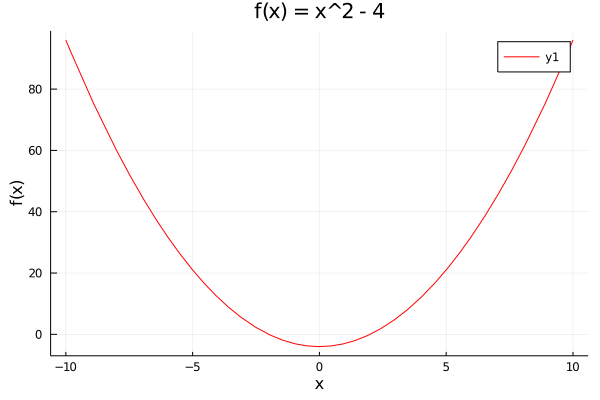

In [61]:
x1, x2 = -10, 10
plot(f1c, x1, x2, c=:red)
xlabel!("x")
ylabel!("f(x)")
title!("f(x) = x^2 - 4")

#### 2. Considere as funções $f_1(x) = e^\frac{x}{4}$ e $f_2(x) = 1,982/x$

a) Invente uma função g(x) cujo o ponto fixo é o ponto de interseção dos gráficos de $y = f_1(x)$ com $y = f_2(x)$

R.: Se igualarmos $f_1$ e $f_2$ chegamos em $e^\frac{x}{4} = 1.982/x$, se isolarmos o x, temos que $e^\frac{x}{4}x = 1.982$. Como queremos uma função $g(x)$, podemos igualar essa função a zero $e^\frac{x}{4}x - 1.982 = 0$  e isolando o x chegamos a denominar como $g(x) = \frac{1.982}{e^\frac{x}{4}}$

b) Verdadeiro ou falso? A iteração dada por $x_{n+1} = g(x_n)$ é convergente no intervalo [0, 2].

R.: Não. Temos uma função que está se aproximando cada vez mais do eixo x, mas ela não possui um zero de função por se tratar de uma exponencial, mas conseguimos ter uma aproximação conforme aumentamos o valor do ponto x inicial. Veja o gráfico abaixo.

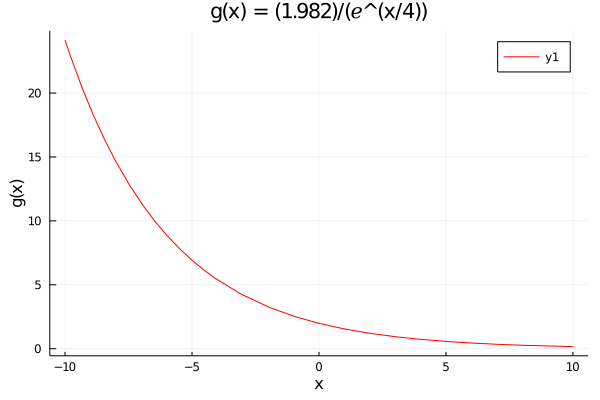

In [140]:
e = MathConstants.e
g(x)=(1.982)/(ℯ^(x/4))
x1, x2 = -10, 10
plot(f2, x1, x2, c=:red)
xlabel!("x")
ylabel!("g(x)")
title!("g(x) = (1.982)/(ℯ^(x/4))")

c) Determine uma aproximação numérica, correta até a segunda casa decimal, do ponto fixo de g(x), partindo do ponto $x_0 = 1,3$.

In [185]:
gc(x) = (1.982)/(ℯ^(x/4))
fgc(x) = x*ℯ^(x/4) - 1.982
x = 1.3

for i=1:100
    g_i = gc(x) 
    f_proxi = fgc(x)
    
    if (abs(f_proxi) <= 1e-2)
        print("Valor encontrado de x ", x) 
        print("\n")
        print("Iterações ", i)
        break;
    end
    
    x = g_i
end


Valor encontrado de x 1.4017479437629823
Iterações 4

#### 3. Explique como aproximar 43^(1/3)  (não precisa calcular!) com o método de Newton e determine um chute inicial problemático.

R.: Para aproximar $43^\frac{1}{3}$ podemos escrever em uma função que o cubo de um número é igual a 43, ou seja, $x^3 = 43$. Se igualarmos essa equação a zero, podemos escrever a função como $f(x) = x^3 - 43$. Com isso chegamos a um problema de zero de função.

Em seguida, basta derivar $f'(x)$ resultando em $3x^2$, chutar um ponto inicial ($x_0$) e realizar a aproximação através de iterações com o auxilio da reta tangente (derivada):

$x_1 = x_0 - \frac{f(x_0)}{f'(x_0)}$

Para cada iteração, espera-se convergir para o zero da função. Com isso, conseguiremos calcular qual é o valor de x para que seu cubo dê 43.

Um chute inicial problemático seria o ponto x=0 pois assim teríamos a derivada nula e não teríamos como calcular pois resulta em uma operação de divisão por zero.

#### 4. Dê exemplo de um função f (x) tal que f (x) é um polinômio de grau dois para qual o método de Newton alterna entre os valores $x_0$ = 1, $x_1$ = 2, $x_2$ = 1, $x_3$ = 2, · · ·


R.: A função que alterna para esses dois valores são funções que possuem raizes 1 e 2. Isso é dado pelo polinômio $x^2 - 3x + 2$

In [6]:
f4(x) = x^2 - 3x + 2
f4d(x) = 2x - 3
x = 1
newton(f4, f4d, x)

(1, 0, :sucesso, 0)

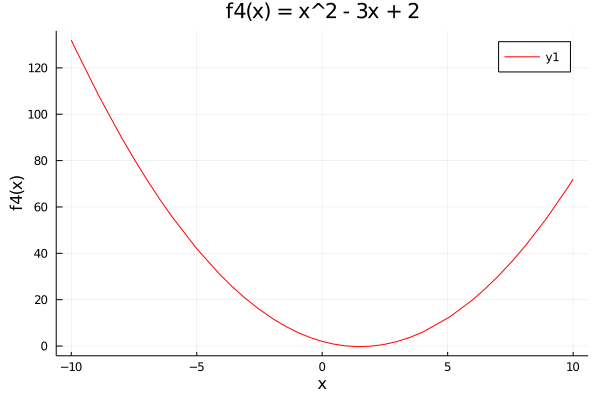

In [9]:
x1, x2 = -10, 10
plot(f4, x1, x2, c=:red)
xlabel!("x")
ylabel!("f4(x)")
title!("f4(x) = x^2 - 3x + 2")

## 3. Eliminação Gaussiana

Na eliminação Gaussiana queremos trabalhar com sistemas da forma Ax = b, onde A é uma matriz e x e b são vetores.

#### BLAS - Basic Linear Algebra Subroutines (Subrotinas básicas de Álgebra Linear)

Referência: http://www.netlib.org/blas/

São operações básicas envolvendo elementos da ÁLgebra Linear. Algumas vezes precisamos transformar os nossos sistemas com operações básicas (multiplicação por escalar, soma vetorial, produto vetorial) para conseguir transformar nossos sistemas.

Existe alguns nívels de BLAS:
- Nível 1: Quando minha operação é linear
- Nível 2: Quando minha operação é quadrática
- Nível 3: Quando minha operação envolve O(3)

In [16]:
A = rand(3, 5)
B = rand(5, 4)
A * B

3×4 Array{Float64,2}:
 1.8262   1.96607  1.42301  2.12628
 1.74698  2.06489  1.71274  1.71811
 2.04666  2.367    2.21446  1.90004

Nota: O Julia utiliza o Open Blas (https://www.openblas.net/)

In [17]:
C = zeros(3, 4)

# Testar operação em baixo nível
for i = 1:3, j = 1:4
    C[i,j] = sum(A[i,k] * B[k,j] for k = 1:5)
end

In [15]:
C

3×4 Array{Float64,2}:
 1.28866   2.11553   1.28121   2.36466
 0.643011  0.653892  0.588484  0.967048
 1.03602   1.09263   1.20533   1.68387

#### Esparcidade da matriz

Esparcidade diz respeito a uma matriz que tem uma grande quantidade de zeros. Auxilia no cálculo com problemas de larga escala para que a gente consiga realizar as operações no computador.

In [23]:
# Operação com 1000 elementos
n = 1000
Float64.size * (3n - 2) # Aqui são 23 mil Bytes se tratando de uma matriz esparça
# O resultado é 3n - 2 pois é a diagonal mais as duas outras diagonais acima e abaixo com n - 1 elementos, n + 2(n-1)

23984

In [22]:
# Se fossemos utilizar uma matriz cheia quadrada (n^2) teríamos:
n = 1000
Float64.size * (n^2)  # Aqui são 8 milhões de Bytes

8000000

In [24]:
using Pkg
pkg"add BenchmarkTools"

   Updating registry at `~/.julia/registries/General`
######################################################################### 100,0%
  Resolving package versions...
  Installed BenchmarkTools ─ v0.5.0
Updating `~/.julia/environments/v1.5/Project.toml`
  [6e4b80f9] + BenchmarkTools v0.5.0
Updating `~/.julia/environments/v1.5/Manifest.toml`
  [6e4b80f9] + BenchmarkTools v0.5.0


In [25]:
using BenchmarkTools

┌ Info: Precompiling BenchmarkTools [6e4b80f9-dd63-53aa-95a3-0cdb28fa8baf]
└ @ Base loading.jl:1278


In [31]:
function multAx1(y, A, x)
    m, n = size(A)
    for i = 1:m
        y[i] = 0.0
        for j = 1:n
            y[i] += A[i,j] * x[j]
        end
    end
end

function multAx2(y, A, x)
    m, n = size(A)
    for i = 1:m
        y[i] = 0.0
    end
    for j = 1:n
        for i = 1:n
            y[i] += A[i,j] * x[j]
        end
    end
end

multAx2 (generic function with 1 method)

In [37]:
n = 1000
A = rand(n,n)
x = rand(n);

In [38]:
y1 = zeros(n)
y2 = zeros(n)

multAx1(y1, A, x)
multAx1(y2, A, x)

y1 ≈ y2 ≈ A * x

true

In [39]:
y = zeros(n)
@benchmark multAx1(y, $A, $x)

BenchmarkTools.Trial: 
  memory estimate:  0 bytes
  allocs estimate:  0
  --------------
  minimum time:     2.544 ms (0.00% GC)
  median time:      3.923 ms (0.00% GC)
  mean time:        4.271 ms (0.00% GC)
  maximum time:     8.614 ms (0.00% GC)
  --------------
  samples:          1171
  evals/sample:     1

In [40]:
y = zeros(n)
@benchmark multAx2(y, $A, $x)

BenchmarkTools.Trial: 
  memory estimate:  0 bytes
  allocs estimate:  0
  --------------
  minimum time:     1.153 ms (0.00% GC)
  median time:      1.791 ms (0.00% GC)
  mean time:        2.023 ms (0.00% GC)
  maximum time:     5.010 ms (0.00% GC)
  --------------
  samples:          2469
  evals/sample:     1

In [41]:
using SparseArrays

In [42]:
A = sprand(10, 10, 0.3) # Matriz esparsa com 30% de esparcidade

10×10 SparseMatrixCSC{Float64,Int64} with 28 stored entries:
  [8 ,  1]  =  0.428084
  [9 ,  2]  =  0.989523
  [10,  2]  =  0.209249
  [1 ,  3]  =  0.500002
  [5 ,  3]  =  0.605162
  [9 ,  3]  =  0.790673
  [2 ,  4]  =  0.041791
  [5 ,  4]  =  0.983441
  [9 ,  4]  =  0.57596
  [3 ,  5]  =  0.279512
  [9 ,  5]  =  0.183363
  [1 ,  6]  =  0.525756
  ⋮
  [10,  6]  =  0.623323
  [3 ,  7]  =  0.611968
  [6 ,  7]  =  0.995777
  [2 ,  8]  =  0.388256
  [9 ,  8]  =  0.645768
  [10,  8]  =  0.654666
  [2 ,  9]  =  0.739421
  [3 ,  9]  =  0.35349
  [5 ,  9]  =  0.296921
  [7 ,  9]  =  0.866517
  [10,  9]  =  0.537595
  [3 , 10]  =  0.180571
  [9 , 10]  =  0.345001

### Sistemas Lineares

In [48]:
A = rand(3,3)
b = A * ones(3)

3-element Array{Float64,1}:
 1.223684075092719
 1.1254745360886595
 2.3310853077971787

In [49]:
A \ b # Resolve Ax = b

3-element Array{Float64,1}:
 0.999999999999999
 0.9999999999999998
 1.0000000000000009

In [120]:
A = [3.0 1 2; -1 2 1; 1 1 4]

3×3 Array{Float64,2}:
  3.0  1.0  2.0
 -1.0  2.0  1.0
  1.0  1.0  4.0

In [121]:
b = A * ones(3)

3-element Array{Float64,1}:
 6.0
 2.0
 6.0

In [131]:
# Linha 1 é pivô para fazer eliminação do primeiro termo das linhas 2 e 3
m21 = A[2,1] / A[1,1]
m31 = A[3,1] / A[1,1]

A[2,:] = A[2,:] - m21 * A[1,:] # Pega a segunda linha e diminui pelo múltiplo da primeira linha
A[3,:] = A[3,:] - m31 * A[1,:] # Pega a terceira linha e diminui pelo múltiplo da primeira linha
A[3,2:end] = A[3,2:end] - m31 * A[1,2:end]
A[3,1] = 0.0

0.0

In [132]:
b[2] = b[2] - m21 * b[1]
b[3] = b[3] - m31 * b[1]

2.8571428571428568

In [133]:
A

3×3 Array{Float64,2}:
 3.0   1.0          2.0
 0.0   2.33333      1.66667
 0.0  -1.11022e-16  2.85714

In [134]:
b

3-element Array{Float64,1}:
 6.0
 4.0
 2.8571428571428568

In [66]:
A[1,1]

3.0

In [135]:
A \ b

3-element Array{Float64,1}:
 1.0
 1.0000000000000002
 0.9999999999999999

In [138]:
m32 = A[3,2] / A[2,2]
A[3,3:end] -= m32 * A[2,3:end]
A[3,2] = 0.0
b[3] -= m32 * b[2]

A

3×3 Array{Float64,2}:
 3.0  1.0      2.0
 0.0  2.33333  1.66667
 0.0  0.0      2.85714

In [139]:
b

3-element Array{Float64,1}:
 6.0
 4.0
 2.8571428571428568

In [140]:
A \ b

3-element Array{Float64,1}:
 1.0
 1.0000000000000002
 0.9999999999999999

In [160]:
"""
    elim_auss!(A,b)
Modifica A e b fazendo a eliminação Gaussiana.
"""
function elim_gauss!(A,b)
    m, n = size(A)
    for j = 1:n
        cols = j+1:n
        for i = j+1:m
            mij = A[i,j] / A[j,j]
            A[i,cols] -= mij * A[j, cols]
            A[i,j] = 0.0
            b[i] -= mij * b[j]
        end
    end
end

elim_gauss!

In [161]:
A = rand(6, 5)
b = A * ones(5)

6-element Array{Float64,1}:
 2.2916064342130715
 2.2194205861127316
 0.8738631553422471
 2.1965360436712826
 2.790617731338686
 2.743028756274983

In [162]:
A

6×5 Array{Float64,2}:
 0.373244  0.633539  0.154148  0.89089    0.239785
 0.289176  0.60961   0.407324  0.179904   0.733406
 0.120294  0.397367  0.104314  0.0201985  0.23169
 0.152768  0.238387  0.810972  0.0990798  0.895329
 0.679939  0.460109  0.359171  0.608492   0.682908
 0.370208  0.554168  0.72576   0.446607   0.646285

In [163]:
elim_gauss!(A, b)

In [164]:
A

6×5 Array{Float64,2}:
 0.373244  0.633539   0.154148   0.89089    0.239785
 0.0       0.118767   0.287896  -0.510325   0.547629
 0.0       0.0       -0.413648   0.563148  -0.736345
 0.0       0.0        0.0        0.731771  -0.527946
 0.0       0.0        0.0        0.0       -0.842049
 0.0       0.0        0.0        0.0        0.0

In [166]:
b

6-element Array{Float64,1}:
  2.2916064342130715
  0.44396749736476804
 -0.5868450405354017
  0.2038247380925975
 -0.8420492226418176
 -9.992007221626409e-16

In [167]:
A \ b # Validação

5-element Array{Float64,1}:
 1.000000000000008
 0.9999999999999962
 1.0000000000000029
 0.9999999999999997
 0.9999999999999974